# Foundations of Data Mining: Assignment 3


Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

 **Deadline:** Thursday, March 29,  2018

In [1]:
from IPython.display import HTML
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides
!pip install git+https://github.com/renatopp/liac-arff@master
!pip install git+https://github.com/openml/openml-python.git@develop
!pip install mglearn
from IPython.display import set_matplotlib_formats, display, HTML
from IPython.core.interactiveshell import InteractiveShell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openml as oml
import mglearn
import os
from cycler import cycler
from pprint import pprint

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
#plt.rcParams['lines.linewidth'] = 1
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
                           cycler('linestyle', ['-', '--', ':',
                                                '-.', '--'])
                           )
       )

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

np, mglearn

# Prints outputs in cells so that we don't have to write print() every time 
#InteractiveShell.ast_node_interactivity = "all"

# Matplotlib tweaks for presentations
plt.rcParams["figure.figsize"] = (5, 3)
plt.rcParams["figure.max_open_warning"] = -1
plt.rcParams['font.size'] = 8; 
plt.rcParams['lines.linewidth'] = 0.5


# Presentations
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': '95%', 'height': 786, 'scroll': True, 'theme': 'solarized', 'transition': 'fade', 'overflow': 'visible', 'start_slideshow_at': 'selected'})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

import numpy as np

  Cloning https://github.com/renatopp/liac-arff (to master) to /tmp/pip-vs6yfj0g-build
  Running setup.py install for liac-arff ... done
  Cloning https://github.com/openml/openml-python.git (to develop) to /tmp/pip-x4cz6d95-build
    100% |████████████████████████████████| 61kB 3.4MB/s 
    100% |████████████████████████████████| 163kB 4.2MB/s 
    100% |████████████████████████████████| 51kB 7.8MB/s 
  Using cached pbr-4.0.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 112kB 4.8MB/s 
    100% |████████████████████████████████| 102kB 6.1MB/s 
    100% |████████████████████████████████| 51kB 6.7MB/s 
    100% |████████████████████████████████| 256kB 3.0MB/s 
    100% |████████████████████████████████| 1.6MB 693kB/s 
    100% |████████████████████████████████| 6.8MB 196kB/s 
  Running setup.py bdist_wheel for pandocfilters ... done
  Stored in directory: /content/.cache/pip/wheels/08/5b/5b/66b3cde6f8215f8345479ef3699d6ddbb860f6ea7072008f8b
  Running setup.py bdist_wh

  Running setup.py bdist_wheel for mglearn ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/79/8b/2b/17dcfb9c9b044b216a58daea9787a0637cb1ffc5b4c2a78e50
Successfully built mglearn


In [0]:
%matplotlib inline
from preamble import *

import sklearn.decomposition as deco
import sklearn.manifold as manifold

plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 

## PCA and Isomap (5 Points, 1+2+2)

Apply PCA and Isomap to images of handwritten digits (see below). You may use sklearn.decomposition and sklearn.manifold.

### a)  
Compute the first two components of the data using PCA. Make a scatter plot of the data in the first two components of PCA indicating class with color.

### b)
 Compute an Isomap embedding with two components with nr_neighbors={5, 50, N-1} (three separate embeddings).
 For each of the Isomap embeddings, apply the function "align" (see below) with "ref_data" as your computed pca embedding and "data" as the isomap embedding. Show a scatter plot of each of the aligned isomap embeddings.
 
### c)

Visually compare how well the classes are separated in the different scatter plots. What is the effect of changing the number of neighbors on the score computed in the alignment function? What does it mean if the score is zero? When do you expect the score to become zero and why?


In [0]:
# Load the data set
from sklearn import datasets
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
N=len(X)

# Align a data set with a reference data set minimizing l_1 error
# Returns aligned data set and alignment error
def align(ref_data, data):
    
    transformations = np.asarray([
        [[0,1],[1,0]], 
        [[0,-1],[1,0]], 
        [[0,1],[-1,0]], 
        [[0,-1],[-1,0]], 
        [[1,0],[0,1]], 
        [[1,0],[0,-1]], 
        [[-1,0],[0,1]], 
        [[-1,0],[0,-1]] 
    ])
    
    score = []
    for i in range(0,8):
        transf_data =   np.matmul(data, transformations[i])
        score.append(np.linalg.norm(transf_data - ref_data, ord=1) )
        
    idx = np.argmin(score)
    transf_data = np.matmul(data,transformations[idx])
    
    print("Aligned the data sets. Score is {0:10.1f}  ".format(score[idx]))
    
    return transf_data, score[idx]


(a)

In [0]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap

In [0]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


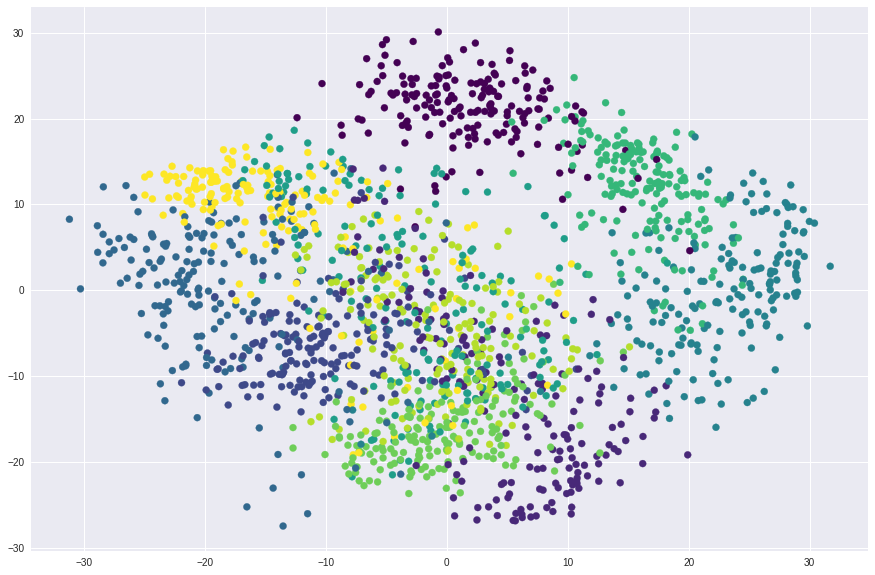

In [9]:
fig = plt.figure(1, figsize=(15,10));
plt.scatter(X_pca[:,0],X_pca[:,1], marker='o', c=y,alpha=1);
plt.show;

(b)

Aligned the data sets. Score is   102234.2  
Aligned the data sets. Score is    31067.5  
Aligned the data sets. Score is        0.0  


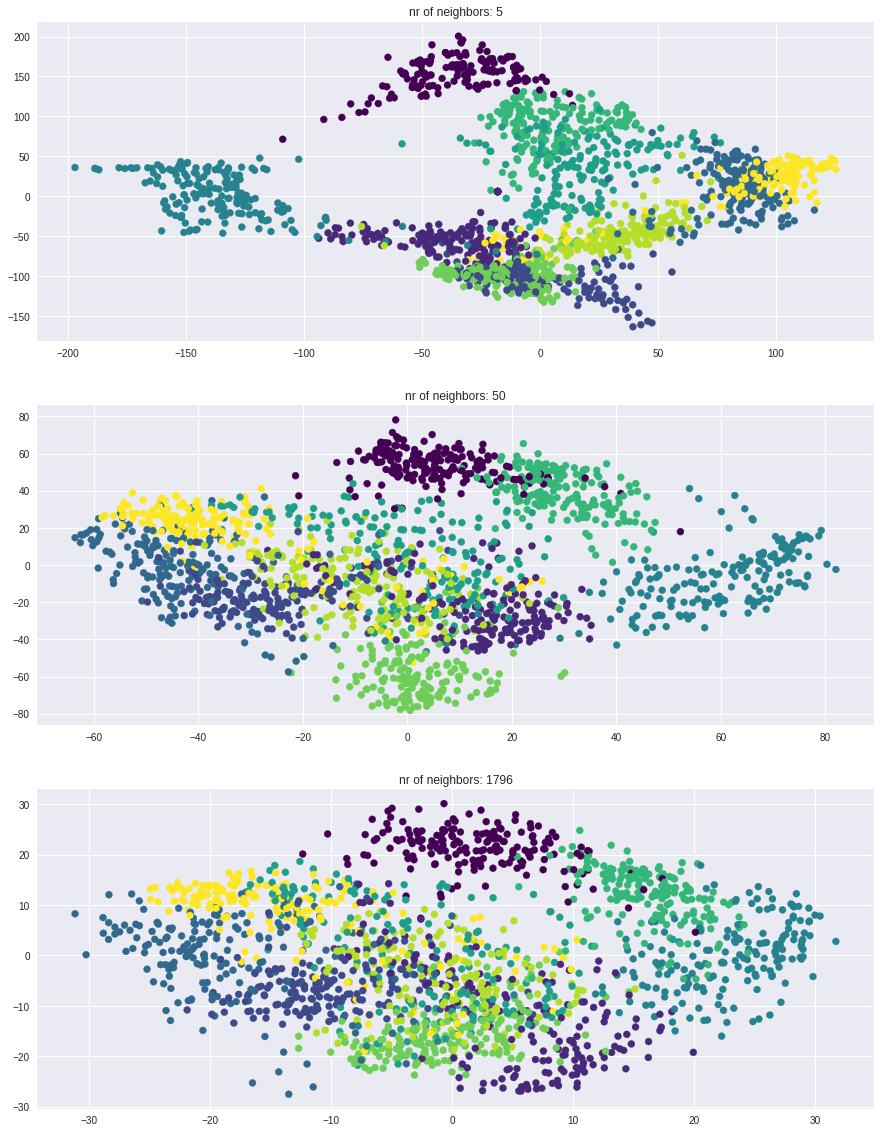

In [11]:
from sklearn.manifold import Isomap

n_minus_1 = len(X)-1
fig, ax = plt.subplots(3, 1, figsize=(15, 20), facecolor='w', edgecolor='k')
n_neighbors = 5, 50, n_minus_1
ax = ax.ravel()

for i, neighbor in enumerate(n_neighbors):
  iso = Isomap(n_components=2, n_neighbors=neighbor)
  X_iso = iso.fit_transform(X)
  transf_data, score = align(X_pca, X_iso)
  
  ax[i].scatter(transf_data[:,0], transf_data[:,1], c=y)
  ax[i].set_title('nr of neighbors: {}'.format(neighbor))
  


(c)


The three figures display scatter plots of isomappings with two components and color-coded classes. As can be seen in figure 1, we very clearly visually differentiate classes by their color coding and coordinates. A light overlap is observed in the bottom around point (25, -100). In figure 2 classes are less distinguishable as compared to figure. To distinguish classes on a visual level, however, is indeed challenging. As can be seen in figure 3, the plot unsurprisingly resembles the scatter plot of the PCA transformation. The first figures shows very well identified classes which can be attritibuted to number of neighbors. The lower number may lead to a neighborhood graph which shortest path is an adequate approximation to geosedic distances. As we increase the neighbors to 50 such approximation, isomap might not be able to separate points that have greater distance. These points, however, are in the neighborhood graph which may be far away in the manifold. With X-1 neighbors the neighborhood graph consists of all data points. An effective isomapping can not be created. The resemblance of the isomapping may very attributed to the shortest path on the graph which is a far inferior approximation as seen in figure 1 or 2. 

We see that for the last figure 3 the score is 0. This is due to the align function and number of neighbors. As we set X-1 neighbors the score becomes zero as it is being aligned with the PCA transformation. Indepently of the align function Isomap will always result in the same plot as PCA when all points are considered in the neighbor graph.

## Classical Multidimensional Scaling (6 Points, 1+2+2+1)

Show that for mean-centered data sets we can recover inner products using
pairwise distance information only. This is used by the isomap embedding algorithm.

We are given all squared pairwise distances of an otherwise unknown
point set ${\bf p}_1,\dots, {\bf p}_n \in \mathbb{R}^d$, i.e., we are given 
for all $1 \leq i,j \leq n$ the values

$$  d_{ij} = \|{\bf p}_i - {\bf p}_j\|^2. $$

We assume that the point set is mean-centered, that is 

$$ \sum_{i=1}^{n} {\bf p}_i = \vec{{\bf 0}}.$$

(where $\vec{{\bf 0}}$ is the vector of zeros)


In the following, $\langle {\bf p}_i , {\bf p}_j \rangle$ denotes the inner 
product of ${\bf p}_i$ and ${\bf p}_j$. 
Prove that the following holds true for mean-centered point sets: 

$$-2 \langle {\bf p}_i , {\bf p}_j \rangle = 
d_{ij}
- \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n}   
-  \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} 
+ \sum_{k=1}^{n}~ \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2} 
$$

You may use the following steps in your derivation.

### a) 
Expand  $d_{ij}$ to yield an expression of $\langle {\bf p}_i, {\bf p}_j \rangle$, $\|{\bf p}_i\|^2$ and $\|{\bf p}_j\|^2$.

Answer:

$ d_{ij} = \| p_i - p_j \|^2 = \langle p_i - p_j, p_i - p_j \rangle = \langle p_i, p_i \rangle - \langle p_i, p_j \rangle -\langle p_j, p_i \rangle + \langle p_j, p_j \rangle = \| p_i \|^2 - 2\langle p_i, p_j \rangle  +  \| p_j \|^2 $

### b) 
Show that the following holds for any $  q \in \mathbb{R}^d$:
$$ \sum_{1 \leq i \leq n} \langle  {\bf p}_i ,  {\bf q} \rangle =   0$$

Answer:

Because we asume that the point set is mean-centered, that is $ \sum_{i=1}^{n} {\bf p}_i = \vec{{\bf 0}}$, it implies for all $1 < j < d$, that $ \sum_{i=1}^{n} i \cdot j = 0$.

Then, we can say for any $q \in \mathbb{R}^d$:

$ \sum_{i=1}^{n} \langle p_i, q \rangle= \sum_{i=1}^{n} \sum_{j=1}^{d} (ij \cdot j) =  \sum_{j=1}^{d} ( j \cdot \sum_{i=1}^{n} ) = \sum_{j=1}^{d} (j \cdot 0) = 0$


### c) 
Prove that 
$$ \|{\bf p}_i\|^2 = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n} \sim \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}$$

Answer:

$ \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n} \sim \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2} =  \sum_{\ell=1}^{n} \frac{\| p_i \|^2 - 2\langle p_i, p_l \rangle  +  \| p_l \|^2}{n} - \sum_{k=1}^{n} \sim \sum_{\ell=1}^{n} \frac{\| p_k \|^2 - 2\langle p_k, p_l \rangle  +  \| p_l \|^2}{2n^2} $

$ \qquad =  \sum_{\ell=1}^{n} \frac{\| p_i \|^2  +  \| p_l \|^2}{n} - \sum_{k=1}^{n} \sim \sum_{\ell=1}^{n} \frac{\| p_k \|^2 +  \| p_l \|^2}{2n^2}$, because of ${\bf b)}$

$ \qquad =  \sum_{\ell=1}^{n} \frac{\| p_i \|^2}{n} +  
            \sum_{\ell=1}^{n} \frac{\| p_l \|^2}{n} -
            \sum_{k=1}^{n} 
            \sim 
            \sum_{\ell=1}^{n} \frac{\| p_k \|^2 }{2n^2}-
            \sum_{k=1}^{n} 
            \sim 
            \sum_{\ell=1}^{n} \frac{\| p_l \|^2}{2n^2}$
            
$ \qquad =   n \cdot \frac{\| p_i \|^2}{n} +  
            \sum_{\ell=1}^{n} \frac{\| p_l \|^2}{n} -            
            n \cdot \sum_{k=1}^{n} \frac{\| p_k \|^2 }{2n^2} -            
            n \cdot \sum_{\ell=1}^{n} \frac{\| p_l \|^2}{2n^2}$
            
$ \qquad =  \| p_i \|^2 +  
            \sum_{\ell=1}^{n} \frac{\| p_l \|^2}{n} -            
            \sum_{k=1}^{n} \frac{\| p_k \|^2 }{2n} -            
            \sum_{\ell=1}^{n} \frac{\| p_l \|^2}{2n}$
           
$ \qquad =  \| p_i \|^2 +  
            \sum_{\ell=1}^{n} \frac{\| p_l \|^2}{n} -            
            \sum_{k=1}^{n} \frac{\| p_k \|^2 }{2n} -            
            \sum_{k=1}^{n} \frac{\| p_k \|^2}{2n}$
            
           
$ \qquad =  \| p_i \|^2 +  
            \sum_{\ell=1}^{n} \frac{\| p_l \|^2}{n} -2 \cdot \frac{1}{2}           
            \sum_{k=1}^{n} \frac{\| p_k \|^2 }{n} $
            
$ \qquad =  \| p_i \|^2 +  
            \sum_{\ell=1}^{n} \frac{\| p_l \|^2}{n} -           
            \sum_{k=1}^{n} \frac{\| p_k \|^2 }{n} $
            
$ \qquad = \| p_i \|^2$


### d) 
Combine the steps in your proof. 

Answer:

From $\bf a)$, $ d_{ij} = \| p_i \|^2 - 2\langle p_i, p_j \rangle  +  \| p_j \|^2 $, thus:

$- 2\langle p_i, p_j \rangle = d_{ij} - \| p_i \|^2 -  \| p_j \|^2 =  d_{ij} - ( \| p_i \|^2 +  \| p_j \|^2) $

From $\bf c)$, $\sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n} \sim \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2} = \| p_i\|^2$. We can then write similarly for $\| p_j\|^2$:

$\| p_j\|^2 = \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} - \sum_{k=1}^{n} \sim \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2} $

Thus, we can write $\| p_i\|^2 + \| p_j\|^2$:


$\| p_i\|^2 + \| p_j\|^2 = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} - \sum_{k=1}^{n} \sim \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2} + \sum_{\ell=1}^{n} \frac{d_{j\ell}}{n} - \sum_{k=1}^{n} \sim \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}$

$ \qquad \qquad = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} +\sum_{\ell=1}^{n} \frac{d_{j\ell}}{n}- 2 \cdot \sum_{k=1}^{n} \sim \sum_{\ell=1}^{n} \frac{d_{k\ell}}{2n^2}$

$ \qquad \qquad = \sum_{\ell=1}^{n} \frac{d_{i\ell}}{n} +\sum_{\ell=1}^{n} \frac{d_{j\ell}}{n}- \sum_{k=1}^{n} \sim \sum_{\ell=1}^{n} \frac{d_{k\ell}}{n^2}$

And therefore we proven that:

$ -2\langle p_i,  p_j \rangle = d_{ij} - \| p_i\|^2 - \| p_j\|^2 = d_{ij} - ( \| p_i\|^2 + \| p_j\|^2 ) $
 

## Locality-sensitive hashing (4 Points, 2+1+1)

### a) 

Prove that if the Jaccard Similarity of two sets is $0$, then minhashing always gives a correct estimate of the Jaccard similarity.

Answer:

We want to prove that minhashing always gives a correct estimate of the Jaccard similarity. 
Minhashing uses a characteristic matrix with indicator vectors as columns. Let $h(C_i)$ the index of the first row from the top, in the column $C_i$, which has a $1$.
The Jaccard similarity coefficient is indicator of the similarity between two sets. Thus, for sets $A$ and $B$ it is defined to be the ratio of the number of elements of their intersection and the number of elements of their union [[1]](https://en.wikipedia.org/wiki/MinHash).
We want the Jaccard Similarity of two sets to be $0$. 
This value $0$ is when the two sets are disjoint, while value $1$ is when they are equal, and strictly between $0$ and $1$ otherwise [[1]](https://en.wikipedia.org/wiki/MinHash).
Thus, the probabilty of two sets having the first $1$ in the same row, which is the number of $(1,1)$ rows over the total number of $(1,1)$, $(0,1)$ and $(1,0)$ rows gives a probability of $0$.

$Pr \sim \left[ h(C_1) = h(C_2) \right] = \frac{|C_1\cap C_2|}{|C_1 \cup C_2|} = sim_j (C_1, C_2) = 0 $ $(\bf1)$


The goal of minhash is to estimate quickly, without explicitly computing the intersection and union [[1]](https://en.wikipedia.org/wiki/MinHash).


Let $ h_1, ..., h_m $ be a number of Jaccard-Similarity hash functions, randomly sampled. Then, we get the estimate:

$ \frac{1}{m} \sum_{i=1}^m I\sim( h_i\sim(C_1) = h_i\sim(C_2) ) (\bf2)$, with $I=1$ if $true$, and $I=0$ otherwise.

Since the sets are disjoint, we get from $(\bf1)$ and $(\bf2)$:


$ \frac{1}{m} \sum_{i=1}^m I\sim( h_i\sim(C_1) = h_i\sim(C_2) ) =  \frac{1}{m} \sum_{i=1}^m 0 = 0$


### b) 
Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=0$ and assume we have a total numer of $m$ hash
functions from this family available.  Which combination of AND-constructions
and OR-constructions should we use to maximally amplify the hash family?

Answer: 

In this assignment we assume $p_2=0$ and a total numer of $m$ hash functions from this family available. To amplify a family one would normlly use an OR-construction. This may also produce a negative effect due to increased number of false positives. However this does not apply anymore due to the assumtpions. Thus, we will utilze the construction, with $0$ probabilty of false positives.


Now, let family $F$ of hash functions $f$ constructed from $n$ random functions $h_{1},...,h_{n}$ from given family $H$. 

Then we have that for $f \in F$:
$f(a)=f(b)$ iff $h_i(a)=h_i(y)$, where $i\in \{1,2,...n\}$

For any $f \in F$, $h_i$ are independently chosen. We know that  $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions, so for $F$, $(d_1, d_2, 1- (1 - p_1)^k, 1 - (1 - p_2)^k)$-locality-sensitive family. 

Therefore, we get that:

$(d_1, d_2, 1- (1 - p_1)^k, 1 - (1 - p_2)^k) = (d_1, d_2, 1- (1 - p_1)^k, 1 - (1 - 0)^k) $

$ \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad= (d_1, d_2, 1- (1 - p_1)^k, 1 - 1) $

$ \qquad \qquad \qquad \qquad \qquad \qquad \qquad \qquad=(d_1, d_2, 1- (1 - p_1)^k, 0) $

### (c) 

Let $H$ be a family of $(d_1,d_2,p_1,p_2)$-locality-sensitive hash functions.
Assume that $p_2=\frac{1}{n}$ and assume we have $n$ data points $\bf P$
which are stored in a hash table using a randomly chosen function $h$ from $H$.
Given a query point $\bf q$, we retrieve the points in the hash bucket with index $h(\bf q)$ to search 
for a point which has small distance to $\bf q$. 
Let $X$ be a random variable that is equal to the size of the set 

$$
\begin{aligned}
\left\{{\bf p \in P}\sim:\sim h({\bf p})=h({\bf q}) \sim\wedge\sim d({\bf p,q}) \geq d_2\right\}\
\end{aligned}
$$

which consists of the false positives of this query.
Derive the expected number of false-positives $E\left[ X \right]$.

Answer:

Define random variable $ Y_i $ , which if the point  $  p_i \in P$ becomes a false-positive in the query with $ q $ and returns $1$, and $0$, otherise. 

Thus, the expectation can be written as $E\left[ X \right] = E\left[ \sum_{i=1}^{n} Y_i \right] = \sum_{i=1}^{n} E\left[ Y_i\right]$ 

Now, the expected value of $ Y_i $:


$E\left[ Y_i\right] = Pr \sim \left[ \sim d (p_i, q) \geq d_2 \sim \right] \cdot Pr \sim \left[  \sim h(p_i) = h(q) \sim\sim|\sim\sim d(p_i, q) \geq d_2 \sim \right]$

$ \qquad = Pr \sim \left[ \sim d (p_i, q) \geq d_2 \sim \right]  \cdot Pr \sim \left[  \sim h(p_i) = h(q) \sim\sim|\sim\sim d(p_i, q) \geq d_2 \sim \right] \leq Pr \sim \left[  \sim h(p_i) = h(q) \sim\sim|\sim\sim d(p_i, q) \geq d_2 \sim \right] $ since $ Pr \sim \left[ \sim d (p_i, q) \geq d_2 \sim \right] \leq 1$

Since $h$ belongs to the family $H$, from previous line we can write that:

$ Pr\sim[\sim h(p_i)=h(q) \sim\sim|\sim\sim d(p_i,q) \geq d_2 \sim] \leq p_2 $

Thus,

$E\left[ Y_i\right] = Pr \sim \left[ \sim d (p_i, q) \geq d_2 \sim \right] \cdot Pr \sim \left[  \sim h(p_i) = h(q) \sim\sim|\sim\sim d(p_i, q) \geq d_2 \sim \right] \leq p_2$

In conclusion,

$E\left[ X \right] = \sum_{i=1}^n E\left[ Y_i \right] \leq \sum_{i=1}^n p_2 = n \cdot p_2 = \frac{n}{n} = 1 $

The expected number of false positives $E\left[ X\right]$ is at most $1$.

